# Assignment 4

### Randomization testing

### Dataset

A game enthusiast claims that Xbox 360 games are better than PS2 games. He randomly samples games from both consoles and collects information about the review scores that the sampled games received on this [website](https://www.ign.com/reviews/games). In the  dataset he collected, there is information about the game title, platform, the review score the games received, the genre, and the release dates. 


In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

### Exercise 1
Our game enthusiast wants to test whether Xbox 360 games receive a higher review score than PS2 games. 

1. Write down the null- and alternative hypothesis.
2. Load the data and print out the head.
3. To run the statistical tests and make plots, create two new variables that contain the data for the PS2 and Xbox 360 datasets. Look at your code from the previous weeks to remind you how to do that. 
4. Before doing a statistical test, it is always a good idea to have a look at your data. Choose an appropriate plot to visualize the data. Show the data for both consoles separately. 
5. Does the plotted data suggest that the hypothesis of our game enthusiast may be right?
6. Do these data meet the normality assumptions required for a t-test?<div style='text-align: right;'>**7 points**</div>

In [291]:
## your code/answer here
def print_question(question_number, sep_line_width = 60):
    print(f"Question {question_number}")
    print(sep_line_width * "=")

print_question(1)
print("H0: The mean review score is equal for Xbox 360 and PS2 games.")
print("H1: The mean review score is higher for Xbox 360 games.")

Question 1
H0: The mean review score is equal for Xbox 360 and PS2 games.
H1: The mean review score is higher for Xbox 360 games.


In [292]:
## your code/answer here
print_question(2)
dataframe = pd.read_csv('PS2_vs_Xbox360.csv')

dataframe.head()

Question 2


,Unnamed: 0.1,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,4101,4101,Amazing,Burnout 2: Point of Impact,/games/burnout-2-point-of-impact/ps2-481982,PlayStation 2,9.0,Racing,Y,2002,9,24
1,3361,3361,Bad,Yanya Caballista: City Skater,/games/yanya-caballista-city-skater/ps2-16279,PlayStation 2,4.0,Sports,N,2001,10,15
2,6989,6989,Okay,Suzuki TT Superbikes: Real Road Racing,/games/suzuki-tt-superbikes-real-road-racing/p...,PlayStation 2,6.1,Racing,N,2005,8,11
3,7404,7404,Great,Call of Duty 2: Big Red One (Collector's Edition),/games/call-of-duty-2-big-red-one/ps2-763356,PlayStation 2,8.0,Shooter,N,2005,11,9
4,4505,4505,Good,Star Wars: The Clone Wars,/games/star-wars-the-clone-wars/ps2-481948,PlayStation 2,7.6,Action,N,2002,12,13


In [293]:
## your code/answer here
print_question(3)
ps2_scores = dataframe[dataframe["platform"] == "PlayStation 2"]["score"]
print("PlayStation 2 scores:")
print(ps2_scores.head(), "\n")

x360_scores = dataframe[dataframe["platform"] == "Xbox 360"]["score"]
print("Xbox 360 scores:")
print(x360_scores.head())

Question 3
PlayStation 2 scores:
0    9.0
1    4.0
2    6.1
3    8.0
4    7.6
Name: score, dtype: float64 

Xbox 360 scores:
29    8.0
30    7.7
31    4.5
32    8.0
33    9.3
Name: score, dtype: float64


In [294]:
## your code/answer here

In [295]:
## your code/answer here

### Exercise 2

Non-parameteric testing is a great alternative for datasets such as these. In this workgroup you will learn how you can use randomization to do hypothesis testing. Before we can do the randomization test, we will need to prepare some variables. Because the data are left skewed we will use the median instead of the mean to compare the two consoles. Do the following things:

 1. Calculate the difference in median score of both consoles, and store it in an appropriately named variable.
 2. Define how many randomization iterations you want to compute (usually 1000 up to 10000), and create an empty numpy array of this size.
 3. Now create a for-loop that loops $n$ times (the number you defined in item 2). Inside the loop, randomly assign each score to a console. Each console should have as many scores as it originally had. 
You can do this by:
1. shuffling all the rows of the 'games' pandas dataframe (using the sample method in pandas) 
2. selecting the first x number of cases that will represent the Xbox 360 games. 
3. selecting the remaining cases that represent the PS2 games. 
4. After you randomly reassigned the rows to the consoles, you calculate the (randomized) differences in the medians of the scores of the two consoles. Store these median differences in a numpy array (that you created in item 2).<div style='text-align: right;'>**5 points**</div>

In [296]:
## your code/answer here
print_question(1)
ps2_median = ps2_scores.median()
xbox360_median = x360_scores.median()
diff = xbox360_median - ps2_median

print(f"median difference is {diff}")

print_question(2)
iterations = 1000
random_median_diff = np.empty(iterations)

print(f"Empty numpy array created : {random_median_diff}")

print_question(3)

xbox = len(x360_scores)
ps2 = len(ps2_scores)

print(xbox)
print(ps2)

#random test
for i in range(iterations):
     #combine all score and shuffle it.
     all_score = pd.concat([x360_scores, ps2_scores])
     shuffled = all_score.sample(frac=1)
     
     #the head of number is xbox score.
     random_xbox = shuffled[:xbox]

     #the rest of number is ps2 score.
     random_ps2 = shuffled[xbox:]

    #calculate difference between two medians.
     random_median_diff[i] = random_xbox.median()- random_ps2.median()

print(f"First five median differences in randomised:{random_median_diff[:5]}")

#1000 times randomisations were run to find out.
#This is the probability of a difference so far by chance.


Question 1
median difference is 0.8999999999999995
Question 2
Empty numpy array created : [ 6.23042070e-307  4.67296746e-307  1.69121096e-306  1.33511562e-306
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  7.56594375e-307  6.23060065e-307  1.78021527e-306  8.34454050e-308
  1.11261027e-306  1.15706896e-306  1.33512173e-306  1.33504432e-306
  2.69029464e-231  8.99874591e-168  1.22279601e-250  3.15718919e+101
  3.86435087e-270 -5.43790705e+303 -1.68542842e+307 -5.99947467e-039
  3.85779561e+101  8.72613822e-231  9.70418707e-101  7.36436601e-019
  5.90302775e-303  9.70418707e-101  3.53127604e-281  5.81186165e+294
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  3.31582079e-316  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e

In [297]:
## your code/answer here

### Exercise 3

Now that the randomizations are done, we want to obtain a p-value on the basis of which we can conclude whether Xbox360 games are rated higher than the PS2 games. 

1. Calculate the p-value, i.e., the probability that the randomized median differences are higher than the actual difference in the medians. 
2. Plot the randomized median differences and the actual median difference in one plot (use a `histplot` or `displot` to plot the randomized differences and use `plt.vlines` to plot the actual median difference).
3. What would the p-value be for a 2-sided test?<div style='text-align: right;'>**5 points**</div>

Question 1
p value is 0.038
Question 2


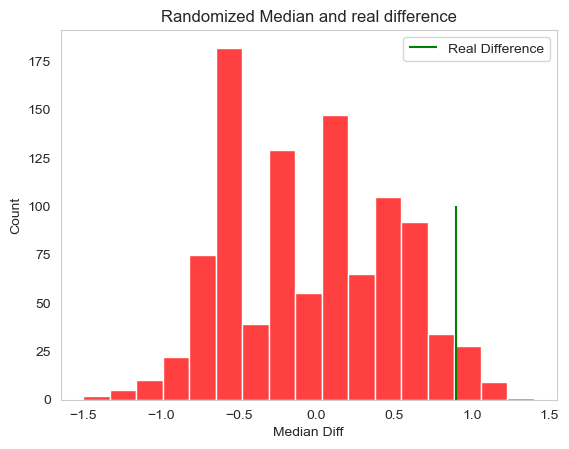

In [298]:
## your code/answer here
print_question(1)

greater_val = []

for value in random_median_diff:
    if value >= diff:
        greater_val.append(value)

count = len(greater_val)

p = count / iterations

print(f"p value is {p}")


print_question(2)

#Draw histgram graph(randome diff)
sns.histplot(random_median_diff, color="red")

#Real diff
plt.vlines(diff, ymin=0, ymax=100, colors="green",label="Real Difference")


plt.title("Randomized Median and real difference")
plt.xlabel("Median Diff")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()




In [299]:
## your code/answer here
print_question(3)

abs_diff = abs(diff)

count_2side = 0

for i in random_median_diff:
    if abs(i) >= abs_diff:
        count_2side += 1

p_2sided = count_2side /iterations

print(f"2sided p value is : {p_2sided}")



Question 3
2sided p value is : 0.077


### Exercise 4
Instead of randomization we could also use the Mann-Whitney U test in this case, which is a non-parametric test to compare whether data in one population are "higher" than in another. 

1. Use the scipy module `stats.mannwhitneyu` to run the test. 
2. How does the p-value compare to the one you obtained through randomization?<div style='text-align: right;'>**2 points**</div>

In [300]:
## your code/answer here
print_question(1)

#Assume that  that xbox is greater 
result = stats.mannwhitneyu(x360_scores,ps2_scores,alternative="greater")

#Show result

print(f"U statistics {result.statistic}")
print(f"p value : {result.pvalue}")



Question 1
U statistics 487.0
p value : 0.015603029578300068


In [301]:
## your code/answer here
print_question(2)

print(f"p value (Mann-Whitney U test): {result.pvalue}")
print(f"p value(randomization, one-sided): {p}")
print(f"p value(randomization, two side): {p_2sided}")

print(f"When tested to see if they were within 5%, \n"
        "The Mann-Whitney U test produced a highly significant result with a slightly smaller p-value.\n"
        "The randomization test produced a moderately significant result with a slightly larger p-value.\n"
        "The 2-sided was the largest and not significant.\n" )

Question 2
p value (Mann-Whitney U test): 0.015603029578300068
p value(randomization, one-sided): 0.038
p value(randomization, two side): 0.077
When tested to see if they were within 5%, 
The Mann-Whitney U test produced a highly significant result with a slightly smaller p-value.
The randomization test produced a moderately significant result with a slightly larger p-value.
The 2-sided was the largest and not significant.



### Exercise 5
In the preceding exercises, you obtained three p-values, using different approaches. What is your conclusion regarding the hypothesis formulated in Exercise 1 above? <div style='text-align: right;'>**2 points**</div>

In [302]:
## your code/answer here

In this assignment, we used a small sample of a larger dataset that you can find [here](https://github.com/erilyth/DeepLearning-Challenges/blob/master/Sentiment_Analysis/ign.csv) in case you are interested in the ratings of all console games. 

**Total number of points**: 21